##### Imports

In [1]:
import pandas as pd
import csv
import logging
from tracker_funcs import read_jem, read_ephys, read_shiny, \
sort_df, create_cond_df, create_region_col, merge_dfs

import seaborn as sns
import matplotlib.pyplot as plt

##### Logging Set-up

In [2]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

##### Miscellaneous Settings

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Logging Comments about this project

In [47]:
logger.info("""Purpose: Discovering similarities/differences in ephys features among new mouse regions""")

INFO:__main__:Purpose: Discovering similarities/differences in ephys features among new mouse regions


##### Main

In [49]:
if __name__ == "__main__":
    jem = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    
    r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"] 
    jem_2020 = sort_df(jem, r_users)
    logger.info("Sorted jem by date range: 1/03/2020 - present")
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    jem_2020 = jem_2020.reset_index()
    start_date = jem_2020["date"].iloc[0][0:10]
    end_date = jem_2020["date"].iloc[-1][0:10]
    jem_2020 = jem_2020.set_index(["date"])
    
    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    mjem_2020 = create_region_col(mjem_2020)
    cor = create_cond_df(mjem_2020, "new_region", "coronal_region")
    sag = create_cond_df(mjem_2020, "new_region", "sagittal_region")
    other = create_cond_df(mjem_2020, "new_region", "other_region")
    v1 = create_cond_df(mjem_2020, "new_region", "v1_region")
    logger.info("Created region pandas dataframes")

INFO:tracker_funcs:Read jem metadata csv as a pandas dataframe
INFO:__main__:Imported jem_metadata.csv as a dataframe
INFO:tracker_funcs:Dropped NaNs from index date, rigOperator and container column
INFO:tracker_funcs:Created dataframe with selected users in container column
INFO:__main__:Sorted jem by date range: 1/03/2020 - present
INFO:__main__:Creating column to check p_container
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a new column(new_region) with default_value
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:tracker_funcs:Filled in new_region column with region labels
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe


##### Creating Time columns for exp_time, rec_time, ext_time, ret_time 

In [6]:
#jem["exp_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["recording.timeStart"])
#jem["rec_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["recording.timeWholeCellStart"])
#jem["ext_time"] = pd.to_datetime(jem["extraction.timeExtractionEnd"]) - pd.to_datetime(jem["extraction.timeExtractionStart"])
#jem["ret_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["extraction.timeExtractionEnd"])

##### Creating post_patch_outcomes based on end seal and post Patch

In [7]:
jem_2020.rigOperator.value_counts()

lindsayn      141
katherineb    126
ramr           96
jessicat       72
kristenh       39
Name: rigOperator, dtype: int64

##### EPhys

In [8]:
ephys = read_ephys()

INFO:tracker_funcs:Read mouse ephys features csv as a pandas dataframe


##### Merge jem_2020 with ephys_features

In [10]:
m_df = merge_dfs(mjem_2020, ephys)

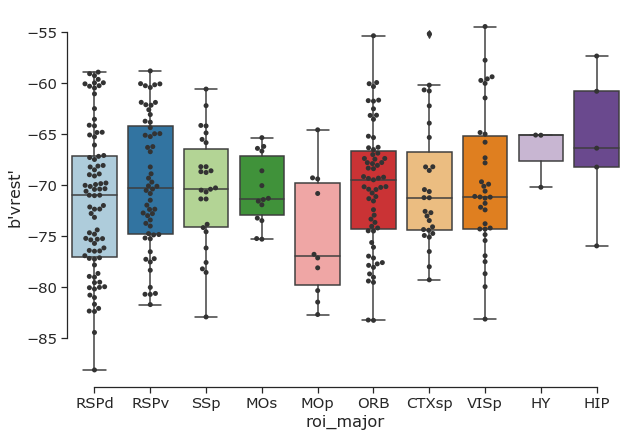

In [34]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'vrest'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'vrest'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

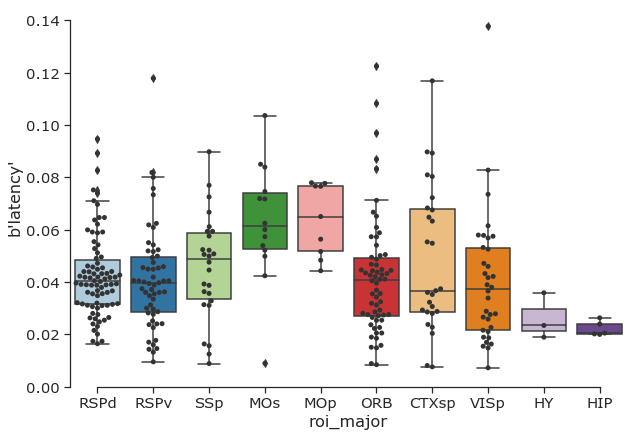

In [39]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'latency'",
              data=m_df[m_df["b'latency'"] < 0.2], color="0.2")
sns.boxplot(x="roi_major",
              y="b'latency'",
              data=m_df[m_df["b'latency'"] < 0.2], palette="Paired")
sns.despine(trim=True, left=False)

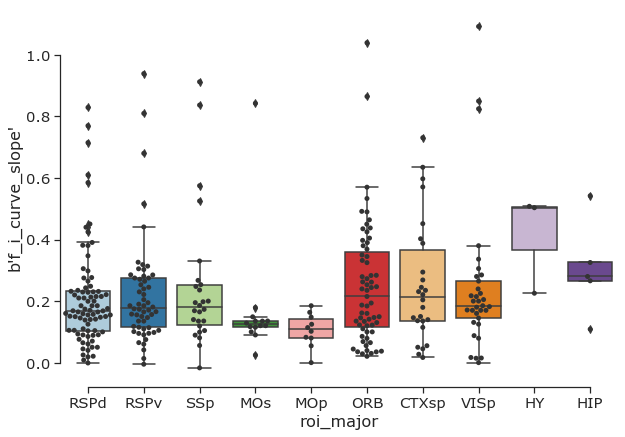

In [43]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'f_i_curve_slope'",
              data=m_df[m_df["b'f_i_curve_slope'"] < 1.1], color="0.2")
sns.boxplot(x="roi_major",
              y="b'f_i_curve_slope'",
              data=m_df[m_df["b'f_i_curve_slope'"] < 1.1], palette="Paired")
sns.despine(trim=True, left=False)

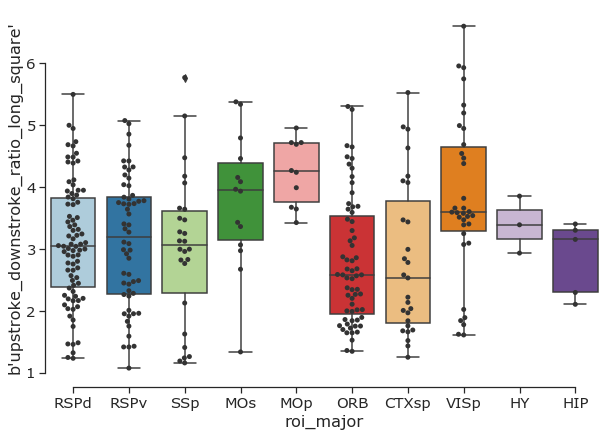

In [44]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'upstroke_downstroke_ratio_long_square'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'upstroke_downstroke_ratio_long_square'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

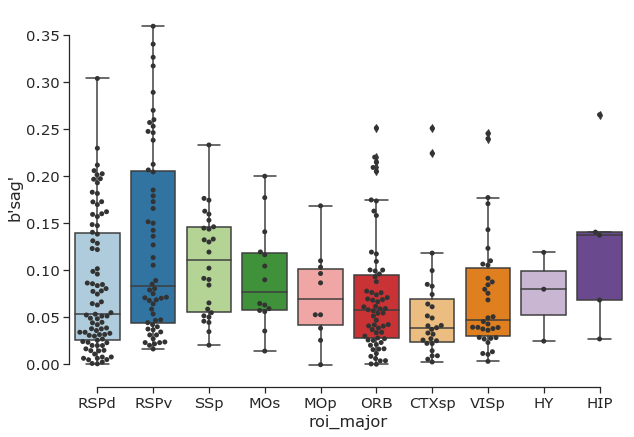

In [45]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'sag'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'sag'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

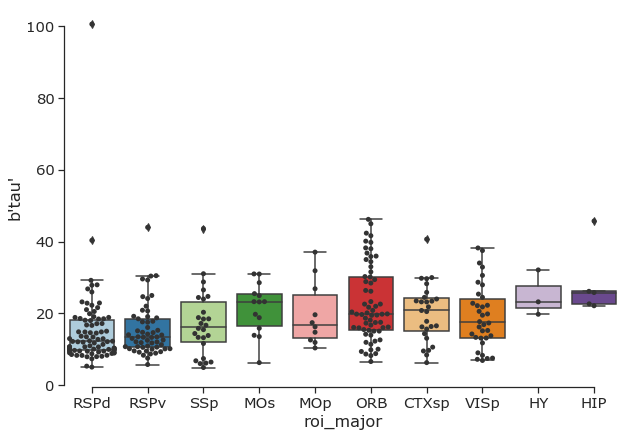

In [46]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'tau'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'tau'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

##### File Paths

In [ ]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"

##### Writing to csv_file

In [ ]:
jem.to_csv(csv_path + "jem.csv")
jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [ ]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
jem.to_excel(writer, "jem_metadata", freeze_panes=(1,0))
jem_2020.to_excel(writer, "jem_2020", freeze_panes=(1,0))
cor.to_excel(writer, "coronal_region", freeze_panes=(1,0))
sag.to_excel(writer, "sagittal_region", freeze_panes=(1,0))
other.to_excel(writer, "other_region", freeze_panes=(1,0))
v1.to_excel(writer, "v1_region", freeze_panes=(1,0))
writer.save()